## Installing all the required libraries..

In [1]:
!pip install pytorch pytorch torchvision
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
ERROR: Could not build wheels for pytorch, which is required to install pyproject.toml-based projects
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 792.4 kB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-wwl236lu
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-wwl236lu
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369497 sha256=539270122d25cbbef55c1e63

## Here are all the available model..

In [2]:
import torch
import clip

device = "cuda" if torch.cuda.is_available() else "cpu"
clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [5]:
!wget https://www.oyorooms.com/blog/wp-content/uploads/2017/10/Feature-Image-min-2-1.jpg

--2023-12-14 16:38:02--  https://www.oyorooms.com/blog/wp-content/uploads/2017/10/Feature-Image-min-2-1.jpg
Resolving www.oyorooms.com (www.oyorooms.com)... 23.45.46.207, 23.45.46.201, 2600:1407:3c00:cb::172d:2eee, ...
Connecting to www.oyorooms.com (www.oyorooms.com)|23.45.46.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘Feature-Image-min-2-1.jpg’

Feature-Image-min-2     [   <=>              ] 180.26K   363KB/s    in 0.5s    

2023-12-14 16:38:05 (363 KB/s) - ‘Feature-Image-min-2-1.jpg’ saved [184590]



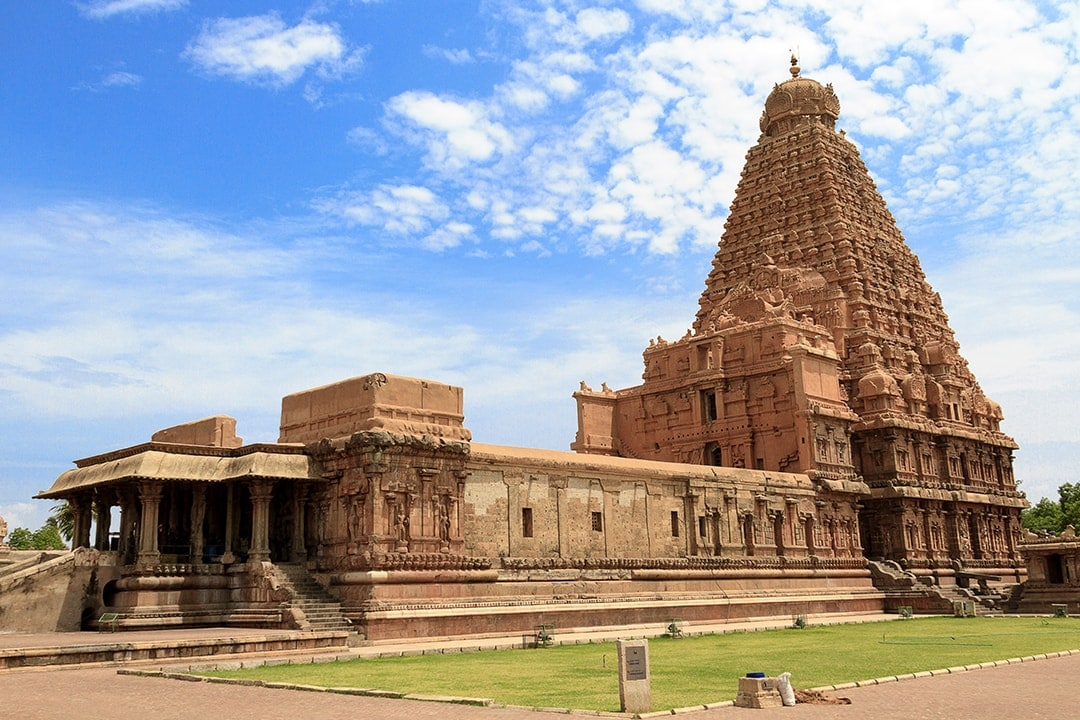

In [6]:
from PIL import Image

im=Image.open('/content/Feature-Image-min-2-1.jpg')
im

In [7]:
from google.colab.patches import cv2_imshow
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
models = clip.available_models()

for model in models:
  print('model: ', model)
  model, preprocess = clip.load(model, device=device)
  image = preprocess(im).unsqueeze(0).to(device)
  text = clip.tokenize(["Picture from India", "Picture not from India","Picture is ambiguous"]).to(device)

  with torch.no_grad():
      image_features = model.encode_image(image)
      text_features = model.encode_text(text)

      logits_per_image, logits_per_text = model(image, text)
      probs = logits_per_image.softmax(dim=-1).cpu().numpy()
  print("Label probs:", probs)


model:  RN50
Label probs: [[7.090e-01 2.910e-01 1.465e-04]]
model:  RN101


100%|███████████████████████████████████████| 278M/278M [00:03<00:00, 76.4MiB/s]


Label probs: [[0.718    0.2812   0.000895]]
model:  RN50x4


100%|███████████████████████████████████████| 402M/402M [00:06<00:00, 66.1MiB/s]


Label probs: [[0.729    0.2683   0.002756]]
model:  RN50x16


100%|███████████████████████████████████████| 630M/630M [00:45<00:00, 14.4MiB/s]


Label probs: [[8.955e-01 1.037e-01 5.884e-04]]
model:  RN50x64


100%|██████████████████████████████████████| 1.26G/1.26G [00:12<00:00, 105MiB/s]


Label probs: [[5.698e-01 4.302e-01 7.784e-05]]
model:  ViT-B/32


100%|███████████████████████████████████████| 338M/338M [00:05<00:00, 70.5MiB/s]


Label probs: [[6.753e-01 3.240e-01 5.875e-04]]
model:  ViT-B/16


100%|████████████████████████████████████████| 335M/335M [00:03<00:00, 101MiB/s]


Label probs: [[0.4636  0.5337  0.00289]]
model:  ViT-L/14


100%|███████████████████████████████████████| 890M/890M [00:09<00:00, 99.7MiB/s]


Label probs: [[0.307    0.692    0.001254]]
model:  ViT-L/14@336px


100%|███████████████████████████████████████| 891M/891M [00:11<00:00, 81.1MiB/s]


Label probs: [[4.338e-01 5.659e-01 5.240e-04]]


## CREATE A ENSEMBLE OF 3 MODELS

1. RN50x16
2. RN50x4
3. ViT-B/32

In [ ]:
from google.colab.patches import cv2_imshow
from PIL import Image

models = ['RN50x16', 'RN50x4', 'ViT-B/32']

device = "cuda" if torch.cuda.is_available() else "cpu"

total_positive = 0


for model in models:
  print('model: ', model)
  model, preprocess = clip.load(model, device=device)
  image = preprocess(im).unsqueeze(0).to(device)
  text = clip.tokenize(["Picture from India", "Picture not from India","Picture is ambiguous"]).to(device)

  with torch.no_grad():
      image_features = model.encode_image(image)
      text_features = model.encode_text(text)

      logits_per_image, logits_per_text = model(image, text)
      probs = logits_per_image.softmax(dim=-1).cpu().numpy()

  total_positive += probs[0][0]
  print("Label probs:", probs)

model:  RN50x16
Label probs: [[8.9585865e-01 1.0356144e-01 5.7989138e-04]]
model:  RN50x4
Label probs: [[0.7270426  0.27016297 0.00279438]]
model:  ViT-B/32
Label probs: [[6.7882115e-01 3.2058513e-01 5.9381459e-04]]


## 3 classes

1. India related
2. Can't be specified (like Flowers, birds etc..)
3. Not India related

In [ ]:
final_positive = total_positive / 3
if final_positive > 0.5:
  print('Yes')


Yes


In [ ]:
!wget https://storage.googleapis.com/conceptual_12m/cc12m.tsv

In [ ]:
!head /content/drive/MyDrive/cc12m.tsv

https://chairish-prod.freetls.fastly.net/image/product/sized/f8d905b6-6c37-4378-a1bd-946584db05ee/design-within-reach-ivory-slipper-chairs-a-pair-0773?aspect=fit&width=640&height=640	Metal Design Within Reach Ivory Slipper Chairs - a Pair For Sale - Image 7 of 10
https://www.abc.net.au/news/image/9329676-3x2-940x627.jpg	Two syringes and a small vial of vaccine.
https://i.pinimg.com/originals/18/34/e4/1834e46cb57a3651812b47d1678e02ec.jpg	The source of Anime quotes & Manga quotes : Photo <PERSON>, Manga Quotes, Art Images, Fan Art, Thoughts, Think, Anime, Crying, Random
https://medialibrarycdn.entrata.com/media_library/13202/58ffa1faa4839101.jpg	Image of Stained Concrete Flooring Throughout for The Towers Seabrook
https://solarpoweredblonde.com/wp-content/uploads/2019/06/24.jpg	Drone shot of Green Bowl beach and two people on the sand and sea around
https://s.yimg.com/ny/api/res/1.2/LExBAQwpEsLWM2pLzfyKeg--~A/YXBwaWQ9aGlnaGxhbmRlcjtzbT0xO3c9ODAw/https://media-mbst-pub-ue1.s3.amazonaws.co

In [ ]:
import pandas as pd


file_path = '/content/drive/MyDrive/cc12m.tsv'

df = pd.read_csv(file_path, delimiter='\t', header=None)

In [ ]:
df

,0,1
0,https://chairish-prod.freetls.fastly.net/image...,Metal Design Within Reach Ivory Slipper Chairs...
1,https://www.abc.net.au/news/image/9329676-3x2-...,Two syringes and a small vial of vaccine.
2,https://i.pinimg.com/originals/18/34/e4/1834e4...,The source of Anime quotes & Manga quotes : Ph...
3,https://medialibrarycdn.entrata.com/media_libr...,Image of Stained Concrete Flooring Throughout ...
4,https://solarpoweredblonde.com/wp-content/uplo...,Drone shot of Green Bowl beach and two people ...
...,...,...
12423369,https://seatplan.com/cdn/images/production/198...,1984 Cast 2016 at the Playhouse Theatre London
12423370,https://media-cdn.tripadvisor.com/media/photo-...,The Haynes Fish and Chip Restaurant: Half chic...
12423371,https://assets.sainsburys-groceries.co.uk/gol/...,The Groovy Food Company Organic Coconut Flour ...
12423372,https://ih1.redbubble.net/image.705161268.6502...,There Are Two Hard Things In Computer Science ...


In [ ]:
!rm -rf /content/imagesMMDS

In [ ]:
import os
from PIL import Image
import pandas as pd


count = 0
failed = 0
for i, r in df.iterrows():
    count += 1
    try:
        os.system('wget -O imagesMMDS/'+str(count)+' '+ r[0])
        im = Image.open('/content/imagesMMDS/'+str(count))
        resized_image = im.resize((200, 200))
        resized_image
    except:
        print("Not found")
        continue



In [ ]:
import clip
import pandas as pd
import os
import torch
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

df = pd.read_csv('/content/drive/MyDrive/konbert-export-d35c1530d3004.csv', header=None)
model, preprocess = clip.load('RN50x16', device="cpu")

count = 0
failed = 0
for i, r in df.iterrows():

    if i < 10:
      continue

    count += 1
    try:
        im = Image.open('/content/imagesMMDS/'+str(count))
        resized_image = im.resize((200, 200))

        device = 'cpu'

        image = preprocess(im).unsqueeze(0).to(device)
        text = clip.tokenize(["Picture from India", "Picture not from India", "Picture is ambiguous"]).to(device)

        with torch.no_grad():
            image_features = model.encode_image(image)
            text_features = model.encode_text(text)

            logits_per_image, logits_per_text = model(image, text)
            probs = logits_per_image.softmax(dim=-1).cpu().numpy()

            total_positive = probs[0][0]
            print("Label probs:", probs)

        if total_positive >= 0.75:
            print(r[0])
            print(r[1])
            print("FOUND")
    except:
        failed += 1
        continue





Label probs: [[0.01933067 0.02215772 0.9585116 ]]
Label probs: [[0.01688047 0.03101798 0.9521016 ]]
Label probs: [[0.33760467 0.15782551 0.5045698 ]]
Label probs: [[0.15269938 0.24341467 0.60388595]]
Label probs: [[0.3661949  0.14185959 0.49194553]]
Label probs: [[0.45004818 0.13890085 0.41105106]]
Label probs: [[0.13185667 0.39276555 0.4753778 ]]
Label probs: [[0.208922   0.12085897 0.67021906]]
Label probs: [[0.19768019 0.03916011 0.7631597 ]]
Label probs: [[0.48278862 0.15946512 0.3577462 ]]
Label probs: [[0.01011301 0.03703845 0.95284855]]
Label probs: [[0.20481075 0.17855836 0.6166309 ]]
Label probs: [[0.02910135 0.13320729 0.83769137]]
Label probs: [[0.257962  0.1760185 0.5660195]]
Label probs: [[0.70244765 0.16950119 0.12805118]]
https://thumbs.dreamstime.com/b/playa-esmeralda-holguin-cuba-view-top-beach-beautiful-caribbean-sea-turquoise-playa-esmeralda-holguin-114428373.jpg
Playa Esmeralda in Holguin, Cuba. The view from the top of the beach. Beautiful Caribbean sea turquoise.


In [ ]:
result = df[df[1].str.contains('India', case=False)]

In [ ]:
result

,0,1
44,https://i.pinimg.com/originals/cc/18/d3/cc18d3...,<PERSON> is rightly the role model of many Ind...
174,https://d1yn1kh78jj1rr.cloudfront.net/image/pr...,An Indian Flag At Mountains.
265,https://files.prokerala.com/news/photos/imgs/1...,Dera Baba Nanak: A view of the the site of muc...
311,https://image.shutterstock.com/image-photo/col...,"Colorful display of preserved food, <PERSON>, ..."
405,https://t1.thpservices.com/previewimage/gallil...,Woman performing <PERSON> the classical dance ...
...,...,...
12422877,https://i.pinimg.com/originals/ca/12/63/ca1263...,As a part of the ongoing Founder's Day Celebra...
12423047,https://images.firstpost.com/wp-content/upload...,<PERSON> opened the batting for India and scor...
12423099,https://www.dhresource.com/f2/albu/g8/M01/88/E...,Wholesale indian wedding decorations for sale ...
12423146,https://media-cdn.tripadvisor.com/media/photo-...,Landscape - Indian Cove Campground: View of th...


In [ ]:
import os
from PIL import Image
import pandas as pd


count = 0
failed = 0
for i, r in result.iterrows():
    count += 1
    try:
        os.system('wget -O indian/'+str(count)+' '+ r[0])

    except:
        print("Not found")
        continue


In [ ]:
!pip install python-magic

In [ ]:
import os
import magic

def get_file_type(file_path):
    mime = magic.Magic(mime=True)
    file_mime = mime.from_file(file_path)

    mime_extensions = {
        'image/jpeg': 'jpg',
        'image/png': 'png',
        'image/gif': 'gif',
        'application/pdf': 'pdf',
        'text/plain': 'txt'
    }


    file_extension = mime_extensions.get(file_mime)

    if file_extension:
        file_name, _ = os.path.splitext(file_path)
        new_file_path = f"{file_name}.{file_extension}"
        os.rename(file_path, new_file_path)
        print(f"File type: {file_mime}\nFile renamed to: {new_file_path}")
    else:
        print(f"File type: {file_mime}\nNo specific extension found for this file type.")


def process_directory(directory):
    for root, dirs, files in os.walk(directory):
        for file_name in files:
            file_path = os.path.join(root, file_name)
            get_file_type(file_path)


directory_path = '/content/drive/MyDrive/indian'
process_directory(directory_path)

File type: image/jpeg
File renamed to: /content/drive/MyDrive/indian/124.jpg
File type: image/jpeg
File renamed to: /content/drive/MyDrive/indian/112.jpg
File type: inode/x-empty
No specific extension found for this file type.
File type: image/jpeg
File renamed to: /content/drive/MyDrive/indian/44.jpg
File type: image/jpeg
File renamed to: /content/drive/MyDrive/indian/171.jpg
File type: image/jpeg
File renamed to: /content/drive/MyDrive/indian/332.jpg
File type: inode/x-empty
No specific extension found for this file type.
File type: image/jpeg
File renamed to: /content/drive/MyDrive/indian/247.jpg
File type: inode/x-empty
No specific extension found for this file type.
File type: image/jpeg
File renamed to: /content/drive/MyDrive/indian/138.jpg
File type: image/jpeg
File renamed to: /content/drive/MyDrive/indian/147.jpg
File type: image/jpeg
File renamed to: /content/drive/MyDrive/indian/244.jpg
File type: image/jpeg
File renamed to: /content/drive/MyDrive/indian/315.jpg
File type: i